In [8]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import shap

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap



<div style="border: 2px solid black; padding: 10px;">
<strong>These 2:</strong>

Eine künstliche Vergrösserung des Datensatzes könnte die Modellgenauigkeit verbessern, birgt jedoch das Risiko, das Modell mit falschen oder verzerrten Daten zu überlasten.
</div>



## Erhobene Daten

In [37]:
df_camping_erhoben = pd.read_csv('df_camping_clean.csv', encoding='utf-8')
df_camping_erhoben

,Name,Ortschaft,Latitude,Longitude,Touristenstellplätze,weiter Unterküfte,kleiner Platz (<80 m2),mittlerer Platz (~100 m2),grosser Platz (>110 m2),Stellplatz am Wasser,...,Region Wallis,Region Zentralschweiz,Region Zuerich,Hauptsaison,Nebensaison,Wandern,Strandzugang,Aktivitäten,Bahnhof,Busstation
0,Camping Gravas,7078 Lenzerheide (GR),46.722760,9.555440,35.0,1,1,0,0,0,...,0,0,0,1,0,1,1,8,0,1
1,Camping Gravas,7078 Lenzerheide (GR),46.722760,9.555440,35.0,1,0,1,0,0,...,0,0,0,1,0,1,1,8,0,1
2,Camping Gravas,7078 Lenzerheide (GR),46.722760,9.555440,35.0,1,1,0,0,0,...,0,0,0,0,1,1,1,8,0,1
3,Camping Gravas,7078 Lenzerheide (GR),46.722760,9.555440,35.0,1,0,1,0,0,...,0,0,0,0,1,1,1,8,0,1
4,Camping St. Cassian,7083 Lenz b. Lenzerheide (GR),46.698692,9.558404,70.0,1,1,0,0,0,...,0,0,0,1,0,1,0,7,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,Lindenhof,ch-2572 Sutz-Lattrigen (BE),47.093373,7.210469,50.0,0,1,0,0,0,...,0,0,0,1,1,0,1,7,0,0
802,Lindenhof,ch-2572 Sutz-Lattrigen (BE),47.093373,7.210469,50.0,0,0,1,0,0,...,0,0,0,1,1,0,1,7,0,0
803,Seeland Camp,2554 Meinisberg (BE),47.162189,7.346157,25.0,0,1,0,0,0,...,0,0,0,0,1,0,0,5,1,1
804,Seeland Camp,2554 Meinisberg (BE),47.162189,7.346157,25.0,0,1,0,0,0,...,0,0,0,1,0,0,0,5,1,1


## Vorbereitung
- leer und Text-Spalten löschen: 'Name', 'Ortschaft', 'Latitude', 'Longitude','Region', 'Golf', 'Disco'
- Multikollinearität ausschliessen: 'Region Nordwestschweiz', 'kleiner Platz (<80 m2)']
- Ausreisser ausschliessen: von 'Preis' und 'Touristenplätze'


In [38]:
df_vorbereitet = pd.read_csv('df_camping_analysis_no_outl.csv', encoding='utf-8')
df_vorbereitet

,Touristenstellplätze,weiter Unterküfte,mittlerer Platz (~100 m2),grosser Platz (>110 m2),Stellplatz am Wasser,Behindertengerechter Zugang,Haustierfreundlichkeit,Waschmaschine und Trockner,Aufenthaltsraum,Gemeinschaftsküche,...,Region Wallis,Region Zentralschweiz,Region Zuerich,Hauptsaison,Nebensaison,Wandern,Strandzugang,Aktivitäten,Bahnhof,Busstation
0,35.0,1,0,0,0,0,1,1,1,0,...,0,0,0,1,0,1,1,8,0,1
1,35.0,1,1,0,0,0,1,1,1,0,...,0,0,0,1,0,1,1,8,0,1
2,35.0,1,0,0,0,0,1,1,1,0,...,0,0,0,0,1,1,1,8,0,1
3,35.0,1,1,0,0,0,1,1,1,0,...,0,0,0,0,1,1,1,8,0,1
4,70.0,1,0,0,0,1,1,1,0,1,...,0,0,0,1,0,1,0,7,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,50.0,0,0,0,0,0,0,1,1,0,...,0,0,0,1,1,0,1,7,0,0
770,50.0,0,1,0,0,0,0,1,1,0,...,0,0,0,1,1,0,1,7,0,0
771,25.0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,5,1,1
772,25.0,0,0,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,5,1,1


## Datensatz vergrössern

In [43]:
# Jittering für numerische Daten
def jitter_data(df, columns, noise_level=0.01):
    jittered_df = df.copy()
    for col in columns:
        # Zufallsstichprobe aus normalverteilten Verteilung
        # Mittelwert 0, Standardabweichung (noise_level), für jede Zeile eine neue Zeile
        jittered_df[col] += np.random.normal(0, noise_level, size=df.shape[0])
    return jittered_df

# Identifizieren numerischer Merkmale
numeric_cols = df_vorbereitet.select_dtypes(include=[np.number]).columns.tolist()

# Anwenden von Jittering
df_jittered = jitter_data(df_vorbereitet, numeric_cols)

# Zusammenführen der ursprünglichen und jittered Daten
df_doppelt = pd.concat([df_vorbereitet, df_jittered])

# Anzeigen des vergrösserten Datensatzes
df_doppelt

,Touristenstellplätze,weiter Unterküfte,mittlerer Platz (~100 m2),grosser Platz (>110 m2),Stellplatz am Wasser,Behindertengerechter Zugang,Haustierfreundlichkeit,Waschmaschine und Trockner,Aufenthaltsraum,Gemeinschaftsküche,...,Region Wallis,Region Zentralschweiz,Region Zuerich,Hauptsaison,Nebensaison,Wandern,Strandzugang,Aktivitäten,Bahnhof,Busstation
0,35.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,8.000000,0.000000,1.000000
1,35.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,8.000000,0.000000,1.000000
2,35.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,8.000000,0.000000,1.000000
3,35.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,8.000000,0.000000,1.000000
4,70.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,7.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,49.982384,0.002927,0.016726,0.017718,-0.018676,-0.010107,-0.011773,0.999096,1.021153,0.004729,...,0.003517,0.012912,0.004756,1.003610,1.003746,-0.001270,0.985186,7.001411,-0.003516,0.007381
770,50.002977,0.015776,1.000872,0.006618,-0.004408,-0.003786,-0.015696,1.008575,0.997905,-0.007329,...,0.009798,0.006403,0.012812,1.007591,1.008065,-0.001989,1.011445,7.000407,-0.001004,-0.020102
771,25.003738,0.003545,0.012430,-0.002991,-0.006478,-0.017193,0.982801,0.994977,-0.014878,-0.002036,...,-0.009780,0.003992,-0.021039,-0.012345,0.998754,0.007869,0.002793,4.990989,1.006354,0.975377
772,24.996228,-0.007378,-0.006455,0.007122,0.000154,-0.002821,0.991361,1.015986,-0.015682,-0.012999,...,-0.002398,-0.015967,-0.005172,0.993179,-0.013228,0.007292,0.001059,4.989377,1.004382,0.982264


## Random Forest

In [44]:
df_doppelt = pd.read_csv('df_camping_analysis_dopp.csv', encoding='utf-8')

In [45]:
def radom_forest_metrics(model, df):
    X = df.drop(columns=['Preis'])
    y = df['Preis']

    # Train-Test-Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Modell trainieren
    model.fit(X_train, y_train)

    # Vorhersagen
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metriken berechnen
    metrics = {
        'train_r2': r2_score(y_train, y_train_pred),
        'test_r2': r2_score(y_test, y_test_pred),
        'train_mse': mean_squared_error(y_train, y_train_pred),
        'test_mse': mean_squared_error(y_test, y_test_pred)
    }

    # Ausgeben von Metriken, Feature Importance Parameter
    return metrics, X_test, y_test, y_test_pred, model.feature_importances_

# Modell definieren
model = RandomForestRegressor(random_state=42, bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300)

# Metriken für beide Datensätze berechnen
metrics_df_v, X_test_v, y_test_v, y_test_pred_v, feature_importances_v = radom_forest_metrics(model, df_vorbereitet)
metrics_df_d, X_test_d, y_test_d, y_test_pred_d, feature_importances_d = radom_forest_metrics(model, df_doppelt)

# Zusammenführen der Ergebnisse in einem DataFrame und ausgeben
results = pd.DataFrame([metrics_df_v, metrics_df_d], index=['df_vorbereitet', 'df_doppelt'])

results

,train_r2,test_r2,train_mse,test_mse
df_vorbereitet,0.95130,0.549294,5.916633,62.386607
df_doppelt,0.95934,0.738973,4.934357,36.426636


### Vorteile
- Verbesserung der Modellgenauigkeit
- robuste Modelle, da dass Modell lernt mit leichten Variationen umzugehen
- keine lange Datenbeschaffung und deshalb schnelle Umsetzung


### Nachteile
- Gefahr der Überanpassung
- Kann zu falschen Schlussfolgerungen führen, wenn die erzeugten Datenpunkte zu stark von den realen Daten abweichen


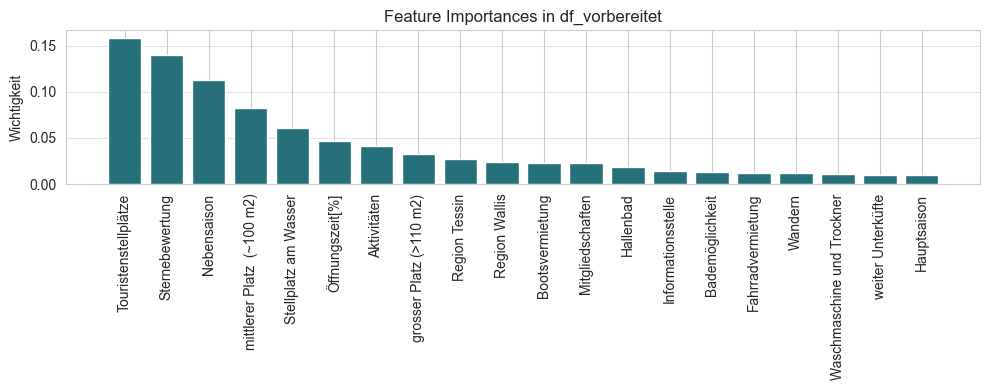

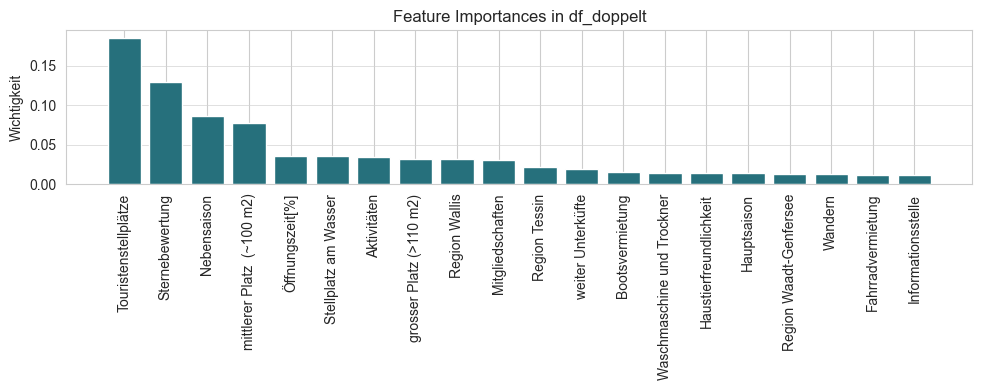

In [52]:
def plot_feature_importances(df_name, df, feature_importances, target_column='Preis', top_n=20, figsize=(10, 4), bar_color='#26707C'):
      # Features extrahieren
    features = df.drop(columns=[target_column]).columns
    sorted_indices = np.argsort(feature_importances)[::-1]

    # Auf die top_n Features beschränken
    top_indices = sorted_indices[:top_n]

    # Plot erstellen
    fig, ax = plt.subplots(figsize=figsize)

    # Titel des Plots mit dem Namen des DataFrames
    ax.set_title(f'Feature Importances in {df_name}', fontsize=12)

    # Achsenbeschriftungen hinzufügen
    ax.set_ylabel('Wichtigkeit')

    # Balken plotten
    ax.bar(range(top_n), feature_importances[top_indices], align='center', color=bar_color)

    # X-Achsenbeschriftungen hinzufügen
    plt.xticks(range(top_n), [features[i] for i in top_indices], rotation=90)

    # Nur horizontale Gitterlinien anzeigen
    ax.grid(which='major', axis='y', linestyle='-', linewidth=0.5, color='lightgray')

    # Layout anpassen und Plot anzeigen
    plt.tight_layout()
    plt.show()

plot_feature_importances('df_vorbereitet', df_vorbereitet, feature_importances_v)
plot_feature_importances('df_doppelt', df_doppelt, feature_importances_d)



<div style="border: 2px solid black; padding: 10px;">
<strong>Fazit:</strong>

Die künstliche Vergrösserung des Datensatzes hat die Modellgenauigkeit verbessert.
Feature Importance zeigt relativ gleiche Resultate.

Doch empfehlenswert den Datensatz mit echten Daten zu vergrössern. Zum Beispiel durch:
- Einbinden neuer Merkmale wie z.B. der Grösse des Fahrzeuges
- Nutzung einer internationalen Buchungsplattform mit mehr Einträgen

</div>